## Imputation

- Replacing missing data with statistical estimates of the missing values is called imputation 

- Imputation completes a dataset and removes missing values 

- Replace by mean if the variable has a Normal distribution 

- Replace by median if the variable has a Skewed distribution 

- Iterative imputation computes the missing value using all the other values in the dataset

- **Random sampling takes a random value from available observations and uses that value to fill the NA**



### When to use it?

- When data are missing completely at random (MCAR) 

### Pros

- Easy
- Completes the dataset and does not loose much information
- Preserves variable variance 

### Cons

- Change of covariance wrt other variables 
- Random in nature 


### Key Takeaway

- We usually create a new variable for the missing data to capture the relations where data is not MCAR 

- So imputation handles the MCAR ascpect, whereas the new variable captures all the other statistical relations 


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train.csv")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Titanic

In [33]:
data = data[['Age', 'Fare','Survived']]
data.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [34]:
data.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']], data['Survived'], test_size=0.2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [72]:
def impute(df, column, dft):
    df_temp = df.copy()
    df_temp[column] = df_temp[column].apply(lambda x: np.random.choice(dft[column].dropna().values) if np.isnan(x) else x)
    return df_temp
  

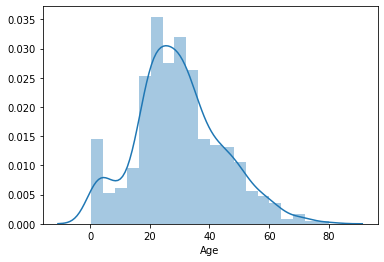

In [64]:
sns.distplot(X_train['Age'])

In [73]:
X_train_0 = impute(X_train, 'Age', X_train)
X_test_0 = impute(X_test, 'Age', X_train)

In [74]:
X_train_0.shape

(712, 2)

In [75]:
type(X_train_0)

pandas.core.frame.DataFrame

In [76]:
X_train_0 = X_train_0.values

In [77]:
type(X_train_0)

numpy.ndarray

In [78]:
X_test_0 = X_test_0.values

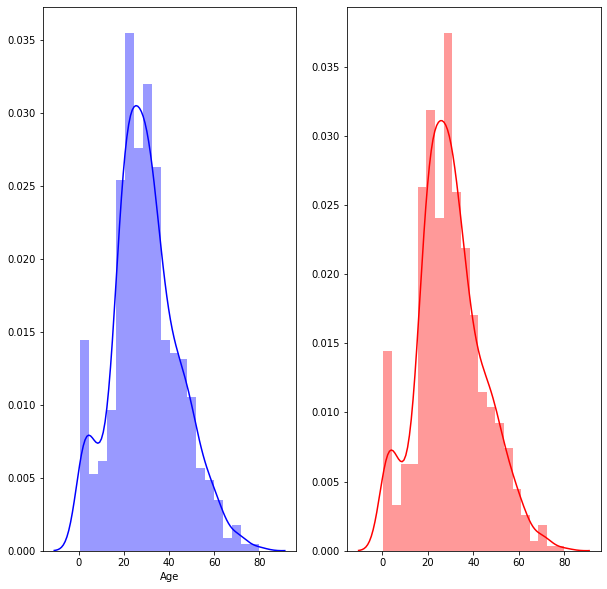

In [79]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_0[:,0], ax = ax[1], color='red')

In [80]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'mean')
X_train_mean = obj.fit_transform(X_train)
X_test_mean = obj.transform(X_test)

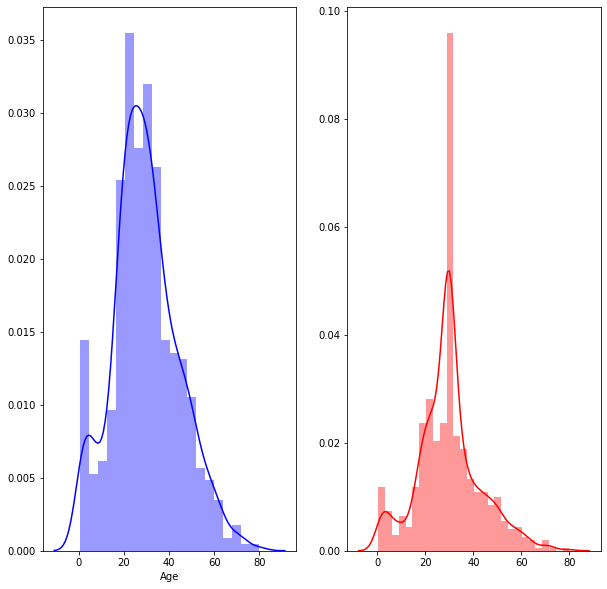

In [81]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_mean[:,0], ax = ax[1], color='red')

In [82]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'median')
X_train_median = obj.fit_transform(X_train)
X_test_median = obj.transform(X_test)

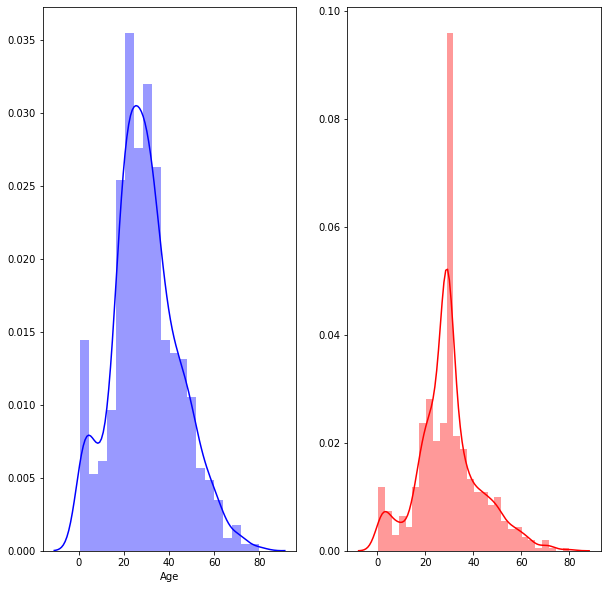

In [83]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_median[:,0], ax = ax[1], color='red')

In [84]:
from sklearn.impute import SimpleImputer
obj = SimpleImputer(missing_values = np.nan, strategy= 'most_frequent')
X_train_mode = obj.fit_transform(X_train)
X_test_mode = obj.transform(X_test)

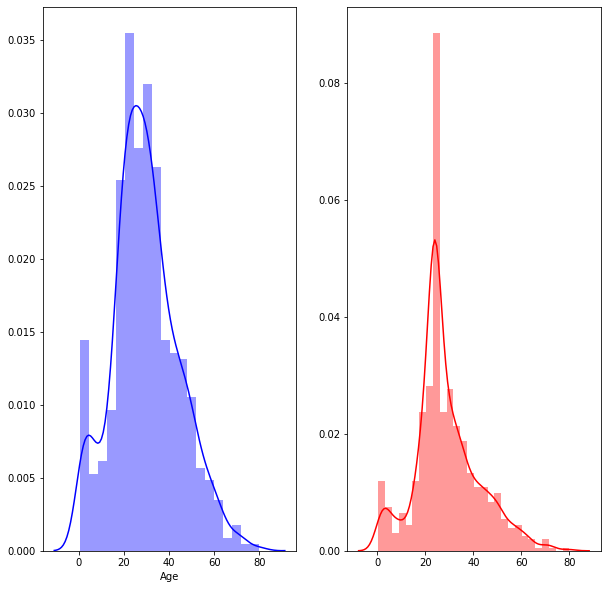

In [85]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
sns.distplot(X_train['Age'], ax = ax[0], color='blue')
sns.distplot(X_train_mode[:,0], ax = ax[1], color='red')

In [86]:
print('Std original: ', X_train['Age'].std())
print('Std 0: ', X_train_0[:,0].std())
print('Std mean: ', X_train_mean[:,0].std())
print('Std median: ', X_train_median[:,0].std())
print('Std mode: ', X_train_mode[:,0].std())

Std original:  14.535715091667424
Std 0:  14.296084680722506
Std mean:  13.039883642860541
Std median:  13.043494997697024
Std mode:  13.238289567000614


### Model performance 

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6983240223463687
0.6759776536312849
0.6759776536312849
0.6815642458100558


In [89]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.664804469273743
0.659217877094972
0.659217877094972
0.659217877094972


In [90]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.664804469273743
0.659217877094972
0.659217877094972
0.659217877094972


In [91]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6815642458100558
0.6983240223463687
0.6983240223463687
0.6927374301675978


In [92]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.664804469273743
0.7150837988826816
0.6815642458100558
0.6815642458100558


In [93]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6983240223463687
0.7039106145251397
0.6089385474860335
0.6089385474860335


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [94]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.7318435754189944
0.7262569832402235
0.7039106145251397
0.6927374301675978


In [95]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.659217877094972
0.659217877094972
0.6480446927374302
0.6759776536312849


In [96]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.7374301675977654
0.7486033519553073
0.7486033519553073
0.7430167597765364


In [97]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.664804469273743
0.5586592178770949
0.6536312849162011
0.6480446927374302


In [98]:
from sklearn.linear_model import Perceptron
classifier = Perceptron()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6871508379888268
0.6871508379888268
0.6983240223463687
0.7094972067039106


In [99]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6815642458100558
0.6815642458100558
0.6815642458100558
0.6815642458100558


In [100]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_0,y_train)
y_pred = classifier.predict(X_test_0)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mean,y_train)
y_pred = classifier.predict(X_test_mean)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_median,y_train)
y_pred = classifier.predict(X_test_median)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

classifier.fit(X_train_mode,y_train)
y_pred = classifier.predict(X_test_mode)
y_pred = np.round(y_pred).flatten()
print(accuracy_score(y_test, y_pred))

0.6703910614525139
0.7094972067039106
0.7150837988826816
0.7094972067039106
